<a href="https://colab.research.google.com/github/kjghfnxggdgbvg/kjghfnxggdgbvg/blob/main/kmeans%2Chierarchical%2Cdbscan2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/content/crime_data.csv",index_col='Unnamed: 0')

In [4]:
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, completeness_score


In [6]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [7]:
df.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

scale the data by standarding

In [8]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

build a rough model by taking any k values

In [9]:
model = KMeans(n_clusters=2, random_state=42)
model.fit(scaled_df)

KMeans(n_clusters=2, random_state=42)

In [10]:
model.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [11]:
model.inertia_

104.96163315756871

In [12]:
wcss = []
for i in range(1,11):
  model = KMeans(n_clusters=i, random_state=42)
  model.fit(scaled_df)
  wcss.append(model.inertia_)

In [13]:
wcss

[200.00000000000003,
 104.96163315756871,
 80.08569526137276,
 57.55425863091105,
 50.33327385184907,
 44.25980763811232,
 40.91266722247346,
 35.69587706333374,
 32.57509993011513,
 29.253498916734607]

draw elbow plot

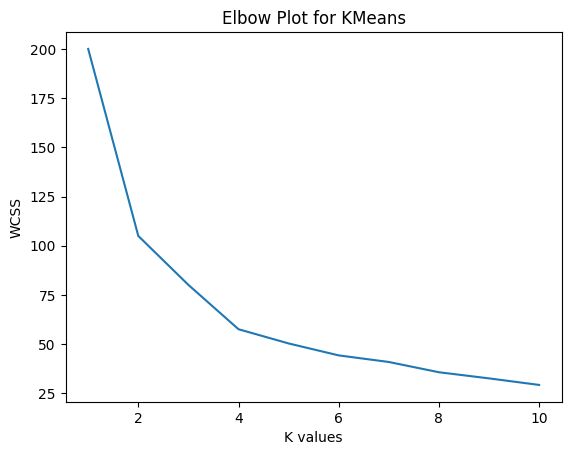

In [14]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Plot for KMeans")
plt.xlabel('K values')
plt.ylabel("WCSS")
plt.show()

build the final moded

In [15]:
final_model = KMeans(n_clusters=3, random_state=42)
final_model.fit(scaled_df)
labels = final_model.labels_

In [16]:
labels

array([1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1,
       2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [17]:
df['Labels'] = labels

In [18]:
df

,Murder,Assault,UrbanPop,Rape,Labels
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,1
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,1
Georgia,17.4,211,60,25.8,1


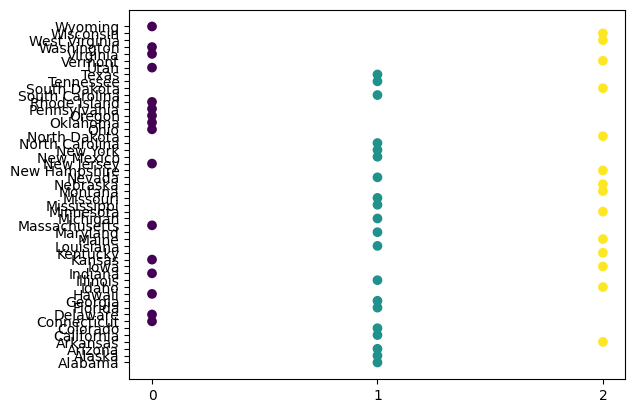

In [19]:
plt.scatter(df['Labels'],df.index, c=labels, cmap='viridis')
plt.xticks([0,1,2])
plt.show()

In [20]:
grp = df.groupby(['Labels'])
grp

In [21]:
for x,y in grp:
  print(y)
  print('_________________________________________________________________________________________________________________________')

               Murder  Assault  UrbanPop  Rape  Labels
Connecticut       3.3      110        77  11.1       0
Delaware          5.9      238        72  15.8       0
Hawaii            5.3       46        83  20.2       0
Indiana           7.2      113        65  21.0       0
Kansas            6.0      115        66  18.0       0
Massachusetts     4.4      149        85  16.3       0
New Jersey        7.4      159        89  18.8       0
Ohio              7.3      120        75  21.4       0
Oklahoma          6.6      151        68  20.0       0
Oregon            4.9      159        67  29.3       0
Pennsylvania      6.3      106        72  14.9       0
Rhode Island      3.4      174        87   8.3       0
Utah              3.2      120        80  22.9       0
Virginia          8.5      156        63  20.7       0
Washington        4.0      145        73  26.2       0
Wyoming           6.8      161        60  15.6       0
_________________________________________________________________

In [22]:
grp.agg(['mean','min','max'])

Murder             Assault             UrbanPop              Rape  \
             mean  min   max     mean  min  max       mean min max      mean   
Labels                                                                         
0        5.656250  3.2   8.5  138.875   46  238  73.875000  60  89  18.78125   
1       12.165000  7.9  17.4  255.250  178  337  68.400000  44  91  29.16500   
2        3.971429  0.8   9.7   86.500   45  190  51.928571  32  66  12.70000   

                    
         min   max  
Labels              
0        8.3  29.3  
1       16.1  46.0  
2        7.3  19.5

In [23]:
# evaluate the model

In [24]:
silhouette_score(df.iloc[:,0:4],labels)

0.3420305383866158

## **hierarchical**

In [25]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [27]:
data = pd.read_csv('/content/crime_data.csv',index_col='Unnamed: 0')

In [28]:
data

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [29]:
data.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 4.0+ KB


In [31]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [32]:
# scale the data by normalizing it

In [33]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data[0:5,:]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

# build the model

In [34]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
model.fit(scaled_data)


AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [35]:
labels = model.labels_
labels

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1])

In [42]:
data['Labels'] = labels
data.head()

,Murder,Assault,UrbanPop,Rape,Labels
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,0


In [43]:
grp = data.groupby(data['Labels'])
grp

In [44]:
for x,y in grp:
  print(y)
  print("____________________________________________________________________________________________________")

                Murder  Assault  UrbanPop  Rape  Labels
Alabama           13.2      236        58  21.2       0
Alaska            10.0      263        48  44.5       0
Arizona            8.1      294        80  31.0       0
California         9.0      276        91  40.6       0
Colorado           7.9      204        78  38.7       0
Florida           15.4      335        80  31.9       0
Georgia           17.4      211        60  25.8       0
Illinois          10.4      249        83  24.0       0
Louisiana         15.4      249        66  22.2       0
Maryland          11.3      300        67  27.8       0
Michigan          12.1      255        74  35.1       0
Mississippi       16.1      259        44  17.1       0
Missouri           9.0      178        70  28.2       0
Nevada            12.2      252        81  46.0       0
New Mexico        11.4      285        70  32.1       0
New York          11.1      254        86  26.1       0
North Carolina    13.0      337        45  16.1 

In [45]:
grp.agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Labels,,,,
0,12.165,255.25,68.4,29.165
1,5.715,132.30,70.8,18.100
2,3.180,78.70,49.3,11.630


In [41]:
data

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [46]:
from scipy.cluster import hierarchy

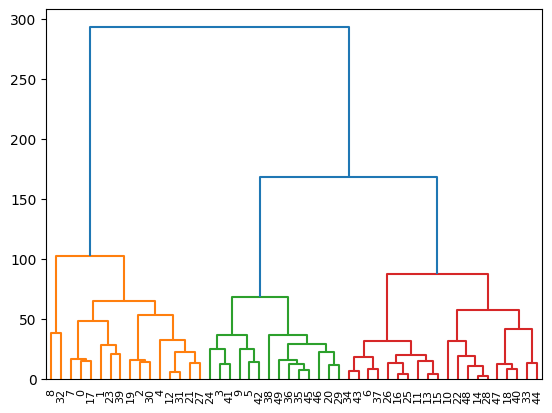

In [48]:
hr = hierarchy.linkage(data.iloc[:,0:4], method='complete')
dh = hierarchy.dendrogram(hr, color_threshold=150)

DBSCAN

In [49]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import scale

In [73]:
df1 = pd.read_csv('/content/crime_data.csv')

In [74]:
df1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [75]:
df1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [77]:
df1.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [78]:
df1['Unnamed: 0']=df1['Unnamed: 0'].astype('category')

In [79]:
df2 = df1.rename({'Unnamed: 0':'place'},axis=1)

In [80]:
df2

,place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [83]:
df3 = df2.drop('place',axis=1)

In [84]:
df3

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [60]:
# create the model

In [85]:
model = DBSCAN(eps=0.5, min_samples=12)
model.fit(df3)

DBSCAN(min_samples=12)

In [92]:
labels = model.labels_
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [91]:
df2['labels'] = labels
df2.head()

,place,Murder,Assault,UrbanPop,Rape,labels
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1


In [93]:
grp = df2.groupby('labels')
grp

In [94]:
for x,y in grp:
  print(y)
  print("____________________________________________________________________________")

             place  Murder  Assault  UrbanPop  Rape  labels
0          Alabama    13.2      236        58  21.2      -1
1           Alaska    10.0      263        48  44.5      -1
2          Arizona     8.1      294        80  31.0      -1
3         Arkansas     8.8      190        50  19.5      -1
4       California     9.0      276        91  40.6      -1
5         Colorado     7.9      204        78  38.7      -1
6      Connecticut     3.3      110        77  11.1      -1
7         Delaware     5.9      238        72  15.8      -1
8          Florida    15.4      335        80  31.9      -1
9          Georgia    17.4      211        60  25.8      -1
10          Hawaii     5.3       46        83  20.2      -1
11           Idaho     2.6      120        54  14.2      -1
12        Illinois    10.4      249        83  24.0      -1
13         Indiana     7.2      113        65  21.0      -1
14            Iowa     2.2       56        57  11.3      -1
15          Kansas     6.0      115     

In [95]:
grp.agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
labels,,,,
-1,7.788,170.76,65.54,21.232


In [96]:
grp2 = df2.groupby('place')
grp2

In [97]:
grp2.agg(['mean'])

,Murder,Assault,UrbanPop,Rape,labels
,mean,mean,mean,mean,mean
place,,,,,
Alabama,13.2,236.0,58.0,21.2,-1.0
Alaska,10.0,263.0,48.0,44.5,-1.0
Arizona,8.1,294.0,80.0,31.0,-1.0
Arkansas,8.8,190.0,50.0,19.5,-1.0
California,9.0,276.0,91.0,40.6,-1.0
Colorado,7.9,204.0,78.0,38.7,-1.0
Connecticut,3.3,110.0,77.0,11.1,-1.0
Delaware,5.9,238.0,72.0,15.8,-1.0
